# Helathcare Diabetes classification

## Importing Required Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("health care diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Project Task: Week 1

## Data Exploration:

### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [ ]:
cols=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df[cols]=df[cols].replace(0,np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

<AxesSubplot:>

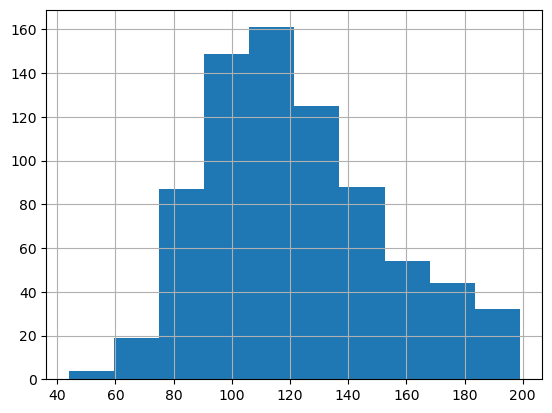

In [ ]:
df["Glucose"].hist()

<AxesSubplot:>

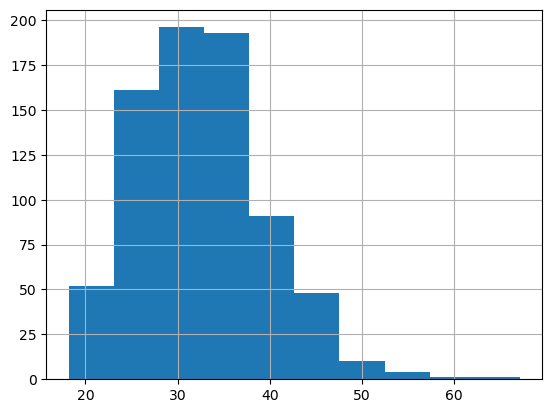

In [ ]:
df["BMI"].hist()

<AxesSubplot:>

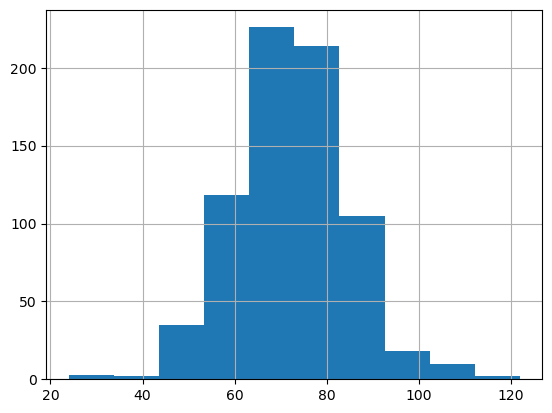

In [ ]:
df["BloodPressure"].hist()

<AxesSubplot:>

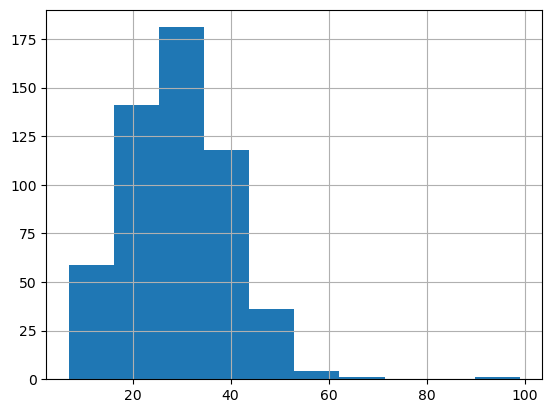

In [ ]:
df["SkinThickness"].hist()

<AxesSubplot:>

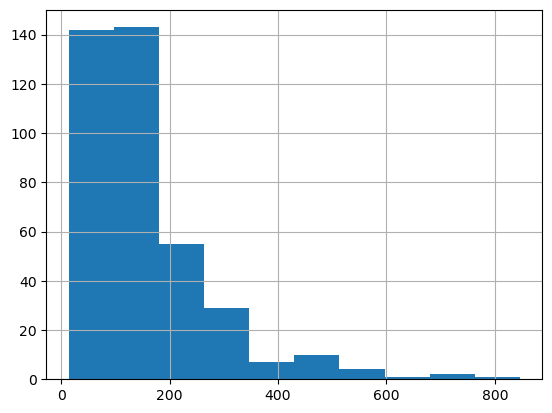

In [ ]:
df["Insulin"].hist()

In [ ]:
# We will repalce insulin nan values with Median as the data is skewed
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)

In [ ]:
cols_mean = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[cols_mean] = df[cols_mean].fillna(df[cols_mean].mean())

In [ ]:
df.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

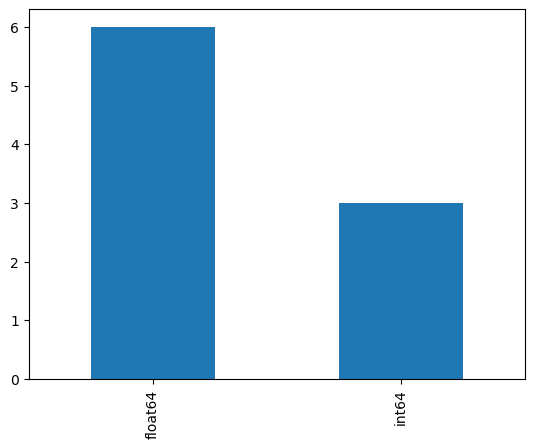

In [ ]:
df.dtypes.value_counts().plot(kind='bar')

# Project Task: Week 2

## Data Exploration:

#### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

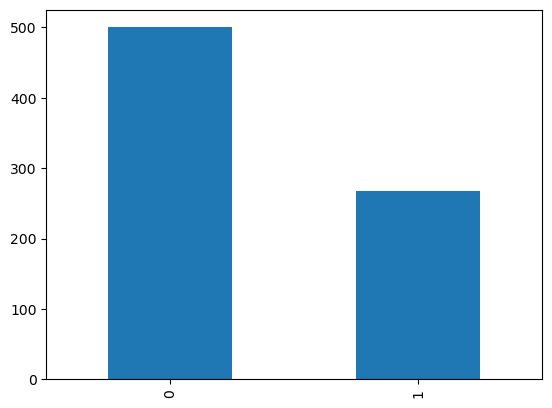

In [ ]:
df['Outcome'].value_counts().plot(kind='bar')


In [ ]:
# Data is skewed therefore we will use SMOTE to balance the data

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
print(X.shape, y.shape)

(768, 8) (768,)


#### SMOTE:-Synthetic Minority Oversampling Technique

In [ ]:
pip install imblearn


     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_resampled, y_resampled = SMOTE(random_state=108).fit_resample(X,y)

In [ ]:
print(X_resampled.shape, y_resampled.shape)

(1000, 8) (1000,)


In [ ]:
y_resampled.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
X_resampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33


In [ ]:
y_resampled.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<AxesSubplot:>

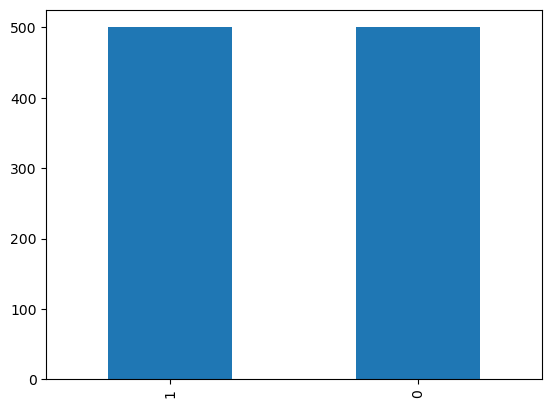

In [ ]:
y_resampled.value_counts().plot(kind='bar')

In [ ]:
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [ ]:
df_resampled = pd.concat([X_resampled,y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,3,164.686765,74.249021,29.153420,125.000000,42.767110,0.726091,29,1
996,0,138.913540,69.022720,27.713033,127.283849,39.177649,0.703702,24,1
997,10,131.497740,66.331574,33.149837,125.000000,45.820819,0.498032,38,1
998,0,105.571347,83.238205,29.153420,125.000000,27.728596,0.649204,60,1


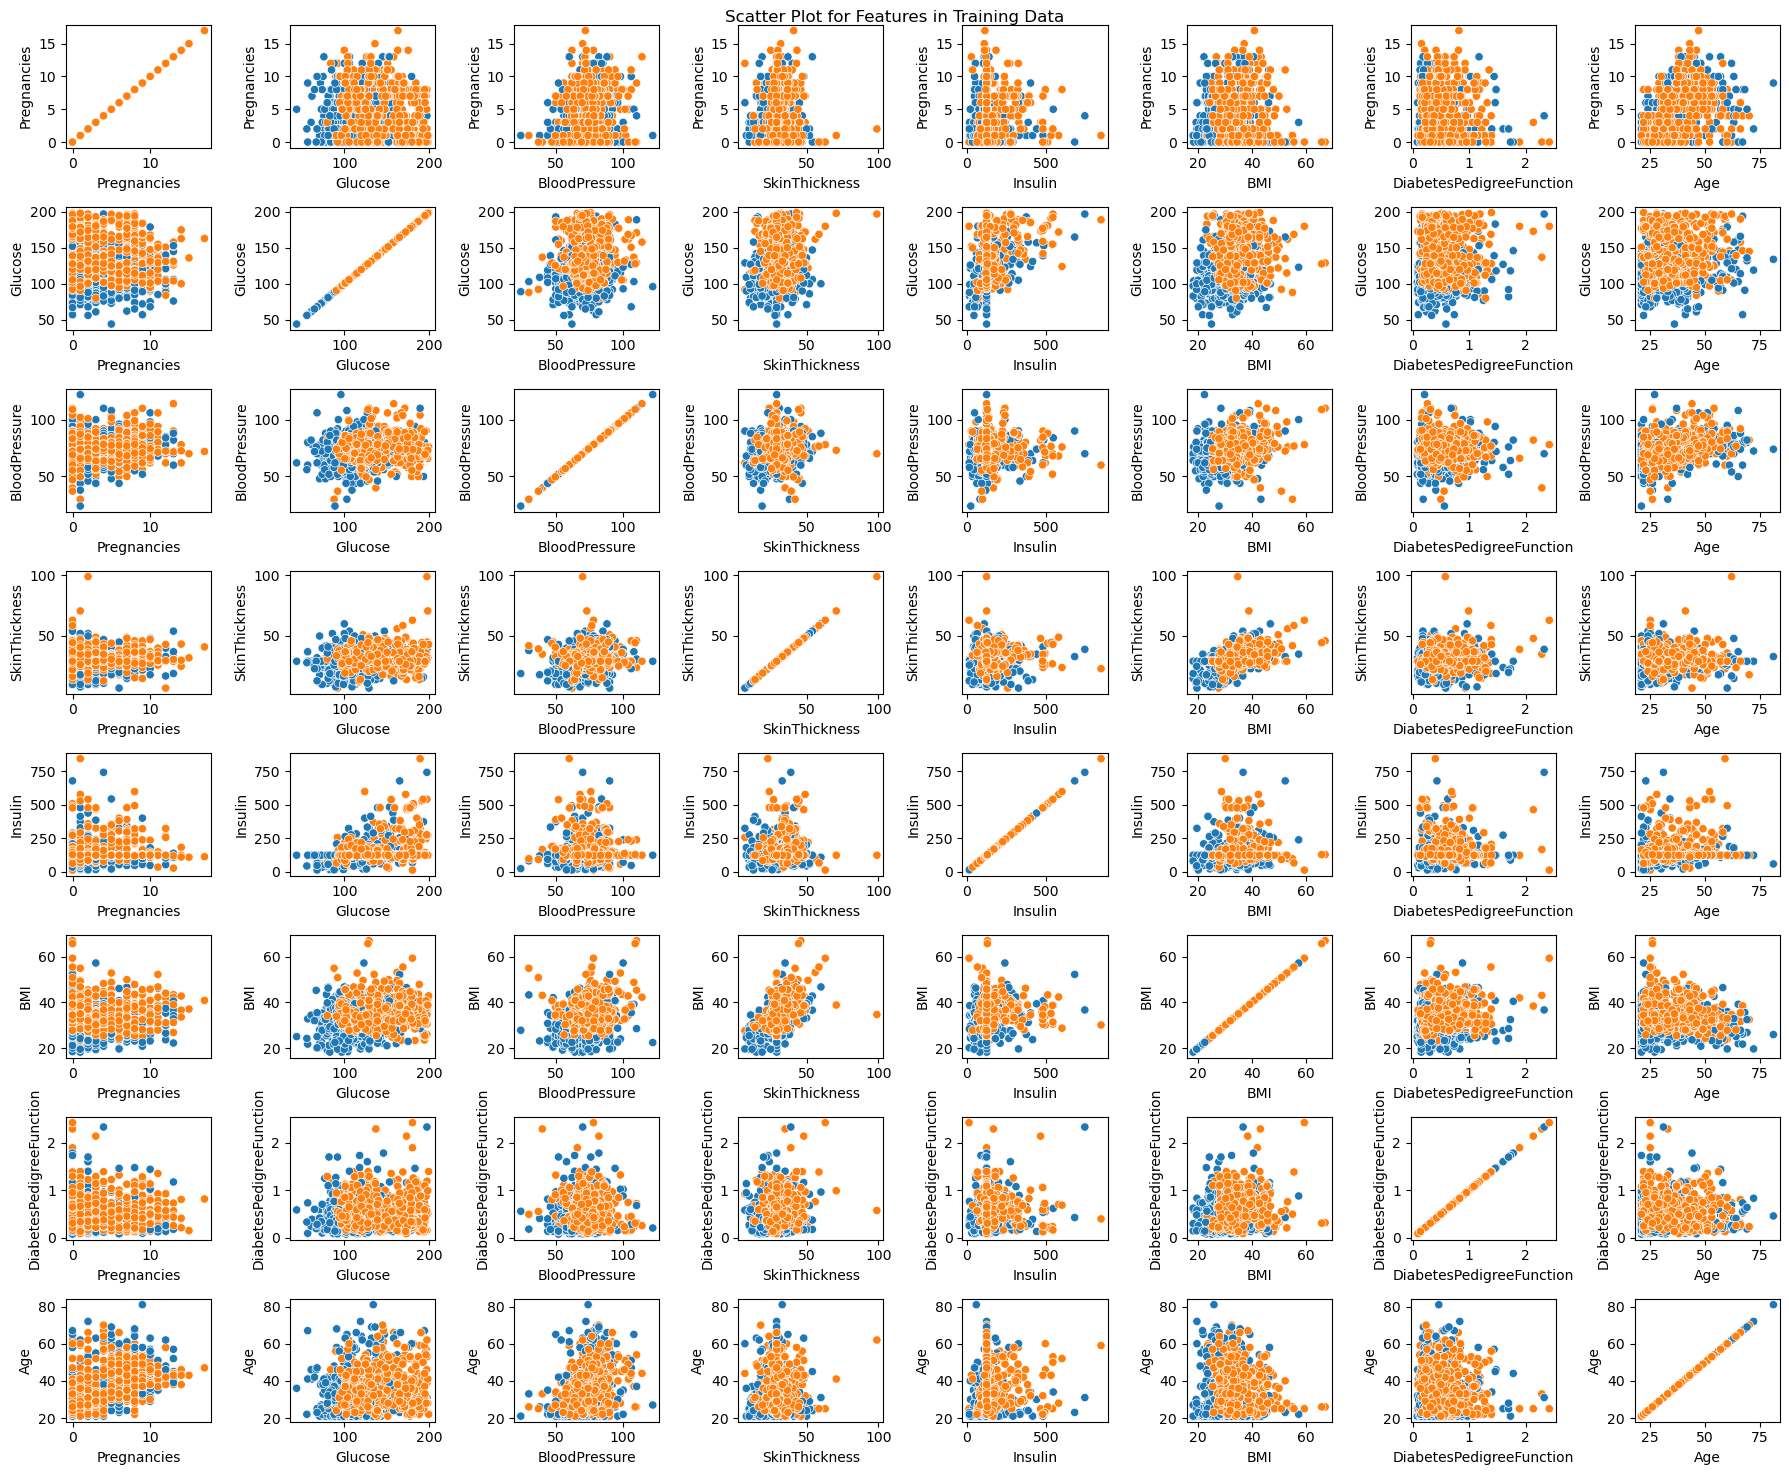

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Features in Training Data')

for i, col_y in enumerate(X_resampled.columns):
    for j, col_x in enumerate(X_resampled.columns):
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=df_resampled, hue="Outcome", legend = False)

plt.tight_layout()

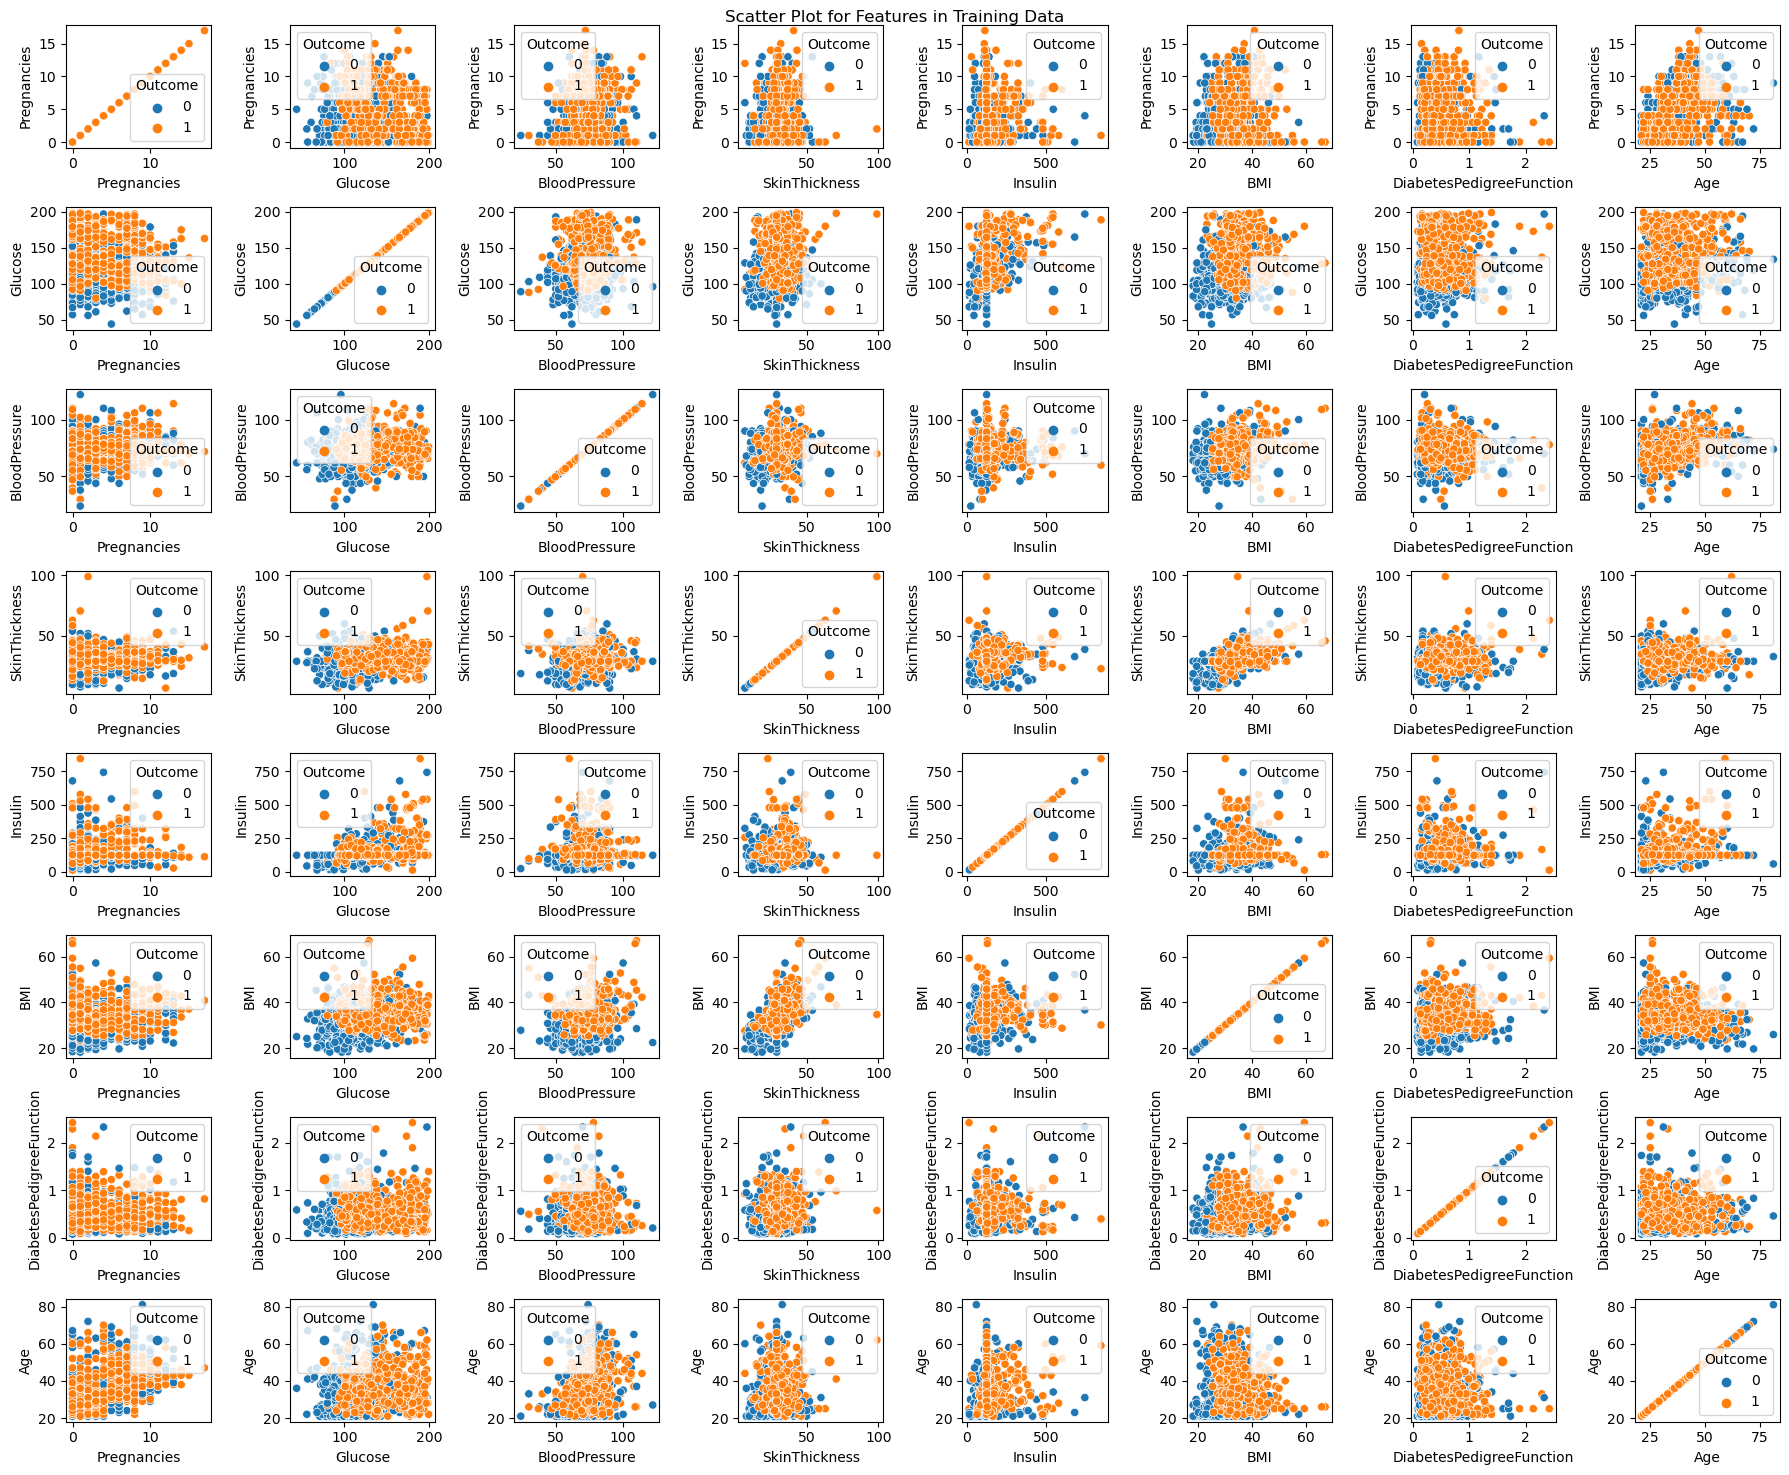

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Features in Training Data')

for i, col_y in enumerate(X_resampled.columns):
    for j, col_x in enumerate(X_resampled.columns):
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=df_resampled, hue="Outcome")

plt.tight_layout()

### 3. Perform correlation analysis. Visually explore it using a heat map.

In [ ]:
X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.079953,0.205232,0.082752,0.009365,0.021006,-0.040210,0.532660
Glucose,0.079953,1.000000,0.200717,0.189776,0.418830,0.242501,0.138945,0.235522
BloodPressure,0.205232,0.200717,1.000000,0.176496,0.034861,0.277565,-0.005850,0.332015
SkinThickness,0.082752,0.189776,0.176496,1.000000,0.170719,0.538207,0.120799,0.117644
Insulin,0.009365,0.418830,0.034861,0.170719,1.000000,0.168702,0.115187,0.096940
BMI,0.021006,0.242501,0.277565,0.538207,0.168702,1.000000,0.177915,0.017529
DiabetesPedigreeFunction,-0.040210,0.138945,-0.005850,0.120799,0.115187,0.177915,1.000000,0.010532
Age,0.532660,0.235522,0.332015,0.117644,0.096940,0.017529,0.010532,1.000000


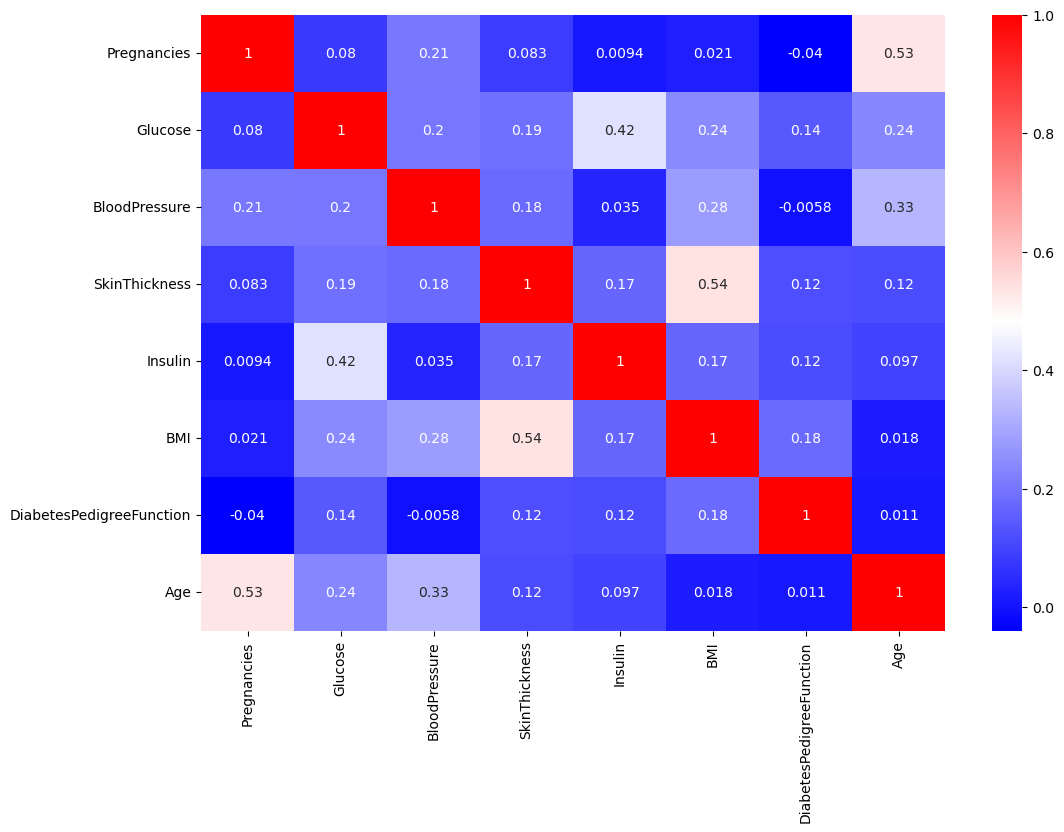

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(X_resampled.corr(), cmap='bwr', annot=True);

# Project Task: Week 3
    

## Data Modeling:

### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33


In [ ]:
X_resampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,train_size=0.8,random_state=123)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 8)
(200, 8)
(800,)
(200,)


# Adaboost classifier

In [ ]:
# Adaboost classifier

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
# prediction test data
predict_test = ada.predict(X_test)

In [ ]:
predict_test

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0], dtype=int64)

In [ ]:
# now we have to see how good or bad is prediction
# Atual value is y_test
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
print(confusion_matrix(y_test,predict_test))

print(classification_report(y_test, predict_test))

[[66 32]
 [19 83]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        98
           1       0.72      0.81      0.76       102

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



In [ ]:
# confusion matrix i.e prediction on train data

predict_train=ada.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))

**********Confusion Matrix **************
[[331  71]
 [ 51 347]]
**********classification Report***********
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       402
           1       0.83      0.87      0.85       398

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800



#### Adaboost classifier
     - test data prediction is 74 %
     - train data prediction is 85 %
     
- Hence model is overfitting

# Xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
#prediction on test data
predict_test= xgb.predict(X_test)

In [ ]:
print("confusion matrix :-")

print(confusion_matrix(y_test,predict_test))

print("classification_report :-")

print(classification_report(y_test, predict_test))

confusion matrix :-
[[68 30]
 [16 86]]
classification_report :-
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        98
           1       0.74      0.84      0.79       102

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [ ]:
# confusion matrix i.e prediction on train data

predict_train=xgb.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))



**********Confusion Matrix **************
[[402   0]
 [  0 398]]
**********classification Report***********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



 # XGB:
        - test dat prediction is    77 %
        - train data prediction is 100%
- Hence XGB model is overfitting


# Random Forest

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#prediction on test data
predict_test= rf.predict(X_test)

print("confusion matrix :-")

print(confusion_matrix(y_test,predict_test))

print("classification_report :-")

print(classification_report(y_test, predict_test))

confusion matrix :-
[[68 30]
 [13 89]]
classification_report :-
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        98
           1       0.75      0.87      0.81       102

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [ ]:
# confusion matrix i.e prediction on train data

predict_train=rf.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))


**********Confusion Matrix **************
[[402   0]
 [  0 398]]
**********classification Report***********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800




# Random Forest :

    - test dat prediction is 79 %
    - train data prediction is 100 %


# Naive Bayes :-


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# Prediction for the test data
predict_test = nb.predict(X_test)

print("******Confusion Matrix************")
print(confusion_matrix(y_test,predict_test))

print("********Classification Report**********")
print(classification_report(y_test,predict_test))

******Confusion Matrix************
[[68 30]
 [45 57]]
********Classification Report**********
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        98
           1       0.66      0.56      0.60       102

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.63      0.62      0.62       200



In [ ]:
predict_train=nb.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))


**********Confusion Matrix **************
[[291 111]
 [194 204]]
**********classification Report***********
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       402
           1       0.65      0.51      0.57       398

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.61       800
weighted avg       0.62      0.62      0.61       800



# Naive Bayes :-
## test dat prediction is 62 %
## train data prediction is 62 %

# SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')

In [ ]:
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Prediction for the test data
predict_test = svm.predict(X_test)

print("******Confusion Matrix************")
print(confusion_matrix(y_test,predict_test))

print("********Classification Report**********")
print(classification_report(y_test,predict_test))

******Confusion Matrix************
[[67 31]
 [17 85]]
********Classification Report**********
              precision    recall  f1-score   support

           0       0.80      0.68      0.74        98
           1       0.73      0.83      0.78       102

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [ ]:
predict_train=svm.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))

**********Confusion Matrix **************
[[298 104]
 [114 284]]
**********classification Report***********
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       402
           1       0.73      0.71      0.72       398

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



# SVM :

    - test dat prediction is 76 %
    - train data prediction is 73 %

#  K-Nearest Neighbour (KNN) Classification:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Prediction for the test data
predict_test = knn.predict(X_test)

print("******Confusion Matrix************")
print(confusion_matrix(y_test,predict_test))

print("********Classification Report**********")
print(classification_report(y_test,predict_test))

******Confusion Matrix************
[[65 33]
 [14 88]]
********Classification Report**********
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        98
           1       0.73      0.86      0.79       102

    accuracy                           0.77       200
   macro avg       0.78      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
predict_train=knn.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))

**********Confusion Matrix **************
[[334  68]
 [ 31 367]]
**********classification Report***********
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       402
           1       0.84      0.92      0.88       398

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# KNN :

    - test dat prediction is 77 %
    - train data prediction is 88 %

# GridSearchCV:

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [ ]:
gs_knn = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(X_resampled, y_resampled)

C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [ ]:
gs_knn.best_params_

{'n_neighbors': 3}

In [ ]:
gs_knn.best_score_

0.771

In [ ]:
# gs_knn.cv_results_
gs_knn.cv_results_['mean_test_score']

array([0.76 , 0.771, 0.765, 0.757, 0.757, 0.739, 0.744, 0.746, 0.744,
       0.755, 0.751, 0.755, 0.754, 0.749])

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn2.score(X_train,y_train)

C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.87625

In [ ]:
knn2.score(X_test,y_test)

C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.765

In [ ]:
# Prediction for the test data
predict_test = knn2.predict(X_test)

print("******Confusion Matrix************")
print(confusion_matrix(y_test,predict_test))

print("********Classification Report**********")
print(classification_report(y_test,predict_test))

******Confusion Matrix************
[[65 33]
 [14 88]]
********Classification Report**********
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        98
           1       0.73      0.86      0.79       102

    accuracy                           0.77       200
   macro avg       0.78      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
predict_train=knn2.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))

**********Confusion Matrix **************
[[334  68]
 [ 31 367]]
**********classification Report***********
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       402
           1       0.84      0.92      0.88       398

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Performance evaluation and optimizing parameters using GridSearchCV:**

In [ ]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [ ]:
gs_svm = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [ ]:
gs_svm.best_params_

{'C': 20, 'gamma': 0.005}

In [ ]:
gs_svm.best_score_

0.8089999999999999

In [ ]:
svm2 = SVC(kernel='rbf', C=20, gamma=0.005, probability=True)

In [ ]:
svm2.fit(X_train, y_train)

SVC(C=20, gamma=0.005, probability=True)

In [ ]:
svm2.score(X_train, y_train)

0.99625

In [ ]:
svm2.score(X_test, y_test)

0.8

In [ ]:
# Prediction for the test data
predict_test = svm2.predict(X_test)

print("******Confusion Matrix************")
print(confusion_matrix(y_test,predict_test))

print("********Classification Report**********")
print(classification_report(y_test,predict_test))

******Confusion Matrix************
[[74 24]
 [16 86]]
********Classification Report**********
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        98
           1       0.78      0.84      0.81       102

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [ ]:
predict_train=svm2.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))

**********Confusion Matrix **************
[[400   2]
 [  1 397]]
**********classification Report***********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       0.99      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



**Performance evaluation and optimizing parameters using cross_val_score:**

In [ ]:
parameters = {'n_estimators': [100,200,300,400,500,700,1000]}

In [ ]:
gs_ada = GridSearchCV(ada, param_grid = parameters, cv=5, verbose=0)
gs_ada.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 700, 1000]})

In [ ]:
gs_ada.best_params_

{'n_estimators': 500}

In [ ]:
gs_ada.best_score_

0.785

In [ ]:
ada.feature_importances_

array([0.04, 0.26, 0.1 , 0.04, 0.14, 0.12, 0.2 , 0.1 ])

In [ ]:
ada2 = AdaBoostClassifier(n_estimators=500)

In [ ]:
ada2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500)

In [ ]:
ada2.score(X_train,y_train)

0.93375

In [ ]:
ada2.score(X_test, y_test)

0.765

In [ ]:
# Prediction for the test data
predict_test = ada2.predict(X_test)

print("******Confusion Matrix************")
print(confusion_matrix(y_test,predict_test))

print("********Classification Report**********")
print(classification_report(y_test,predict_test))

******Confusion Matrix************
[[66 32]
 [15 87]]
********Classification Report**********
              precision    recall  f1-score   support

           0       0.81      0.67      0.74        98
           1       0.73      0.85      0.79       102

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [ ]:
predict_train=ada2.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))

**********Confusion Matrix **************
[[374  28]
 [ 25 373]]
**********classification Report***********
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       402
           1       0.93      0.94      0.93       398

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



**Performance evaluation and optimizing parameters using GridSearchCV:**

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
gs_xgb = GridSearchCV(xgb, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv=5, verbose=0)
gs_xgb.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, mono

In [ ]:
gs_xgb.best_params_

{'n_estimators': 100}

In [ ]:
gs_xgb.best_score_

0.8822599999999999

In [ ]:
xgb.feature_importances_

array([0.09928638, 0.2612183 , 0.07872735, 0.09336226, 0.11461236,
       0.13456336, 0.09343994, 0.12479001], dtype=float32)

In [ ]:
xgb2 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic',
                    nthread=4, seed=10, learning_rate= 0.05, max_depth= 7, n_estimators= 180)

C:\Users\patil.DESKTOP-PMFNMKJ\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [ ]:
xgb2.score(X_train,y_train)

0.9975

In [ ]:
xgb2.score(X_test, y_test)

0.785

In [ ]:
# Prediction for the test data
predict_test = xgb2.predict(X_test)

print("******Confusion Matrix************")
print(confusion_matrix(y_test,predict_test))

print("********Classification Report**********")
print(classification_report(y_test,predict_test))

******Confusion Matrix************
[[69 29]
 [14 88]]
********Classification Report**********
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        98
           1       0.75      0.86      0.80       102

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [ ]:
predict_train=xgb2.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))

**********Confusion Matrix **************
[[401   1]
 [  1 397]]
**********classification Report***********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       398

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



# Naive Bayes :-


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# Prediction for the test data
predict_test = nb.predict(X_test)

print("******Confusion Matrix************")
print(confusion_matrix(y_test,predict_test))

print("********Classification Report**********")
print(classification_report(y_test,predict_test))

******Confusion Matrix************
[[68 30]
 [45 57]]
********Classification Report**********
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        98
           1       0.66      0.56      0.60       102

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.63      0.62      0.62       200



In [ ]:
predict_train=nb.predict(X_train)

print("**********Confusion Matrix **************")

print(confusion_matrix(y_train,predict_train))

print("**********classification Report***********")

print(classification_report(y_train,predict_train))


**********Confusion Matrix **************
[[291 111]
 [194 204]]
**********classification Report***********
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       402
           1       0.65      0.51      0.57       398

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.61       800
weighted avg       0.62      0.62      0.61       800



# Naive Bayes :-
## test dat prediction is 62 %
## train data prediction is 62 %

Among all models, Naive_Bayes has given best accuracy and f1_score. Therefore we will build final model using Naive_Bayes.

In [ ]:
final_model=nb

## Week 4:
### Data Modeling:
**(1) Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used:**

In [ ]:
cr = classification_report(y_test, final_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.69      0.64        98
           1       0.66      0.56      0.60       102

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.63      0.62      0.62       200



In [ ]:
confusion = confusion_matrix(y_test, final_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[68 30]
 [45 57]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     # also called recall
Specificity = TN/(TN+FP)

In [ ]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)


Accuracy: 0.625
Precision: 0.655
Sensitivity: 0.559
Specificity: 0.694
